<a href="https://colab.research.google.com/github/zeroxiga/ML-Land-Use-Classification/blob/main/Land%20Use%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Land Use Classification
## Introduction
Land use classification is an important task to understand our changing environment. One approach to this involves the use of data from aerial sensors that captures different spectral reflectance properties of the ground below. From this data, the land type can be classified.

In [ ]:
# import all the important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, NuSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

Using this data:

1. Train a C-KNN model to classify land classification.

2. Train an ensemble of binary classifiers to predict a wine’s quality. In doing this you should train both a one vs one and one vs all model. Comment on differences in performance and training speed. Compare the performance of the two models, while also considering the class imbalance in the data. Explore how the error costs can be changed to improve performance for those classes with limited data.

In [ ]:
# reading in the multiclass data set
forest_training = pd.read_csv('./Data/Q2/training.csv')
forest_testing = pd.read_csv('./Data/Q2/testing.csv')

forest_training.info()
forest_training.describe()
forest_testing.info()
forest_testing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
class                  198 non-null object
b1                     198 non-null int64
b2                     198 non-null int64
b3                     198 non-null int64
b4                     198 non-null int64
b5                     198 non-null int64
b6                     198 non-null int64
b7                     198 non-null int64
b8                     198 non-null int64
b9                     198 non-null int64
pred_minus_obs_H_b1    198 non-null float64
pred_minus_obs_H_b2    198 non-null float64
pred_minus_obs_H_b3    198 non-null float64
pred_minus_obs_H_b4    198 non-null float64
pred_minus_obs_H_b5    198 non-null float64
pred_minus_obs_H_b6    198 non-null float64
pred_minus_obs_H_b7    198 non-null float64
pred_minus_obs_H_b8    198 non-null float64
pred_minus_obs_H_b9    198 non-null float64
pred_minus_obs_S_b1    198 non-null float64
pred_minus_obs_S_b2    198 non-nul

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


       count
class       
d      27.27
h      24.24
o      18.69
s      29.80
       count
class       
d      32.31
h      11.69
o      14.15
s      41.85


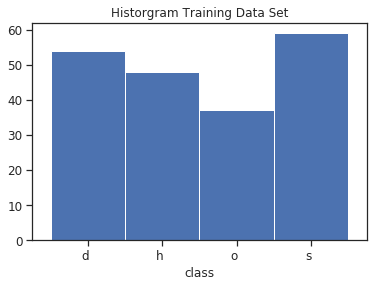

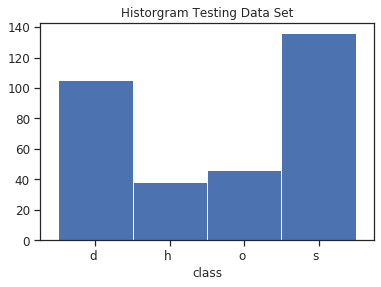

In [ ]:
# Check class distribution
df_training_count = pd.DataFrame(forest_training.groupby('class').size(), columns=['count'])
df_training_count.plot(kind='bar', title ="Historgram Training Data Set", figsize=(6, 4), legend=False, fontsize=12, rot=0, width=1)
print(round(df_training_count/forest_training.shape[0]*100,2))

df_testing_count = pd.DataFrame(forest_testing.groupby('class').size(), columns=['count'])
df_testing_count.plot(kind='bar', title ="Historgram Testing Data Set", figsize=(6, 4), legend=False, fontsize=12, rot=0, width=1)
print(round(df_testing_count/forest_testing.shape[0]*100,2))

In [ ]:
# List columns that contain null values
df_training = pd.DataFrame({'Null-Value Percentage': forest_training.isna().mean().round(4) * 100})
df_training[df_training['Null-Value Percentage'] > 0]

df_testing = pd.DataFrame({'Null-Value Percentage': forest_testing.isna().mean().round(4) * 100})
df_testing[df_testing['Null-Value Percentage'] > 0]

,Null-Value Percentage


(198, 28)
(130, 28)
(195, 28)


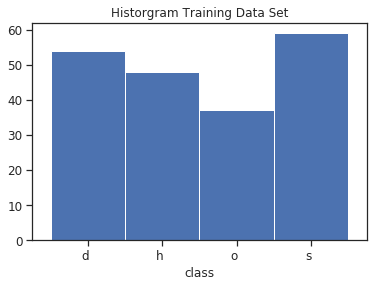

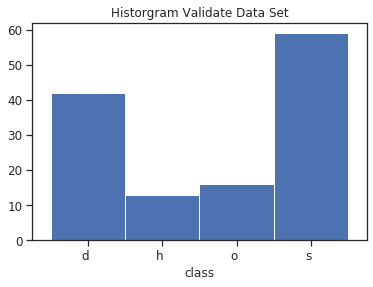

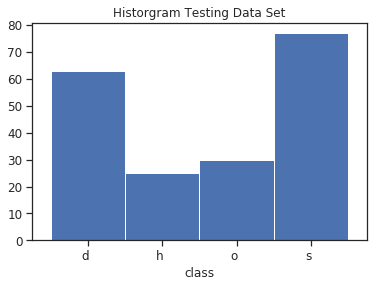

In [ ]:
# seperating into our covariates/feratures and our response variable
train = forest_training
test, validate = np.split(forest_testing.sample(frac=1), [int(.6*len(forest_testing))])

# Check Class Distribution
print(train.shape)
print(validate.shape)
print(test.shape)

df_train_count = pd.DataFrame(train.groupby('class').size(), columns=['count'])
df_train_count.plot(kind='bar', title ="Historgram Training Data Set", figsize=(6, 4), legend=False, fontsize=12, rot=0, width=1)

df_val_count = pd.DataFrame(validate.groupby('class').size(), columns=['count'])
df_val_count.plot(kind='bar', title ="Historgram Validate Data Set", figsize=(6, 4), legend=False, fontsize=12, rot=0, width=1)

df_test_count = pd.DataFrame(test.groupby('class').size(), columns=['count'])
df_test_count.plot(kind='bar', title ="Historgram Testing Data Set", figsize=(6, 4), legend=False, fontsize=12, rot=0, width=1)

In [ ]:
# seperating into our covariates/feratures and our response variable
X_train = train.drop('class', axis=1)
Y_train = train['class']

X_val = validate.drop('class', axis=1)
Y_val = validate['class']

X_test = test.drop('class', axis=1)
Y_test = test['class']

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [ ]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_validate, Y_validate, Validate=True):
    fig = plt.figure(figsize=[25, 8])
    label = 'Validation' if Validate else 'Testing'
    if Validate :
        ax = fig.add_subplot(1, 2, 1)
        conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', cmap=plt.cm.Blues, ax=ax)
        conf.ax_.set_title('Training Set Performance');
        ax = fig.add_subplot(1, 2, 2)
        conf = plot_confusion_matrix(model, X_validate, Y_validate, normalize='true', cmap=plt.cm.Blues, ax=ax)
        conf.ax_.set_title(label + ' Set Performance');
    else :
        ax = fig.add_subplot(1, 2, 1)
        conf = plot_confusion_matrix(model, X_validate, Y_validate, normalize='true', cmap=plt.cm.Blues, ax=ax)
        conf.ax_.set_title(label + ' Set Performance');

    pred = model.predict(X_validate)
    print('Misclassified samples: %d'%(Y_validate != pred).sum())
    print('Accuracy (' + label + ' Set): ' + str(sum(pred == Y_validate)/len(Y_validate))) 

## CKNN
Again, we'll start with CKNN, and an arbitrary number of neighbours.

CKNN, with No. Neighbours = 3
Misclassified samples: 13
Accuracy (Validation Set): 0.9


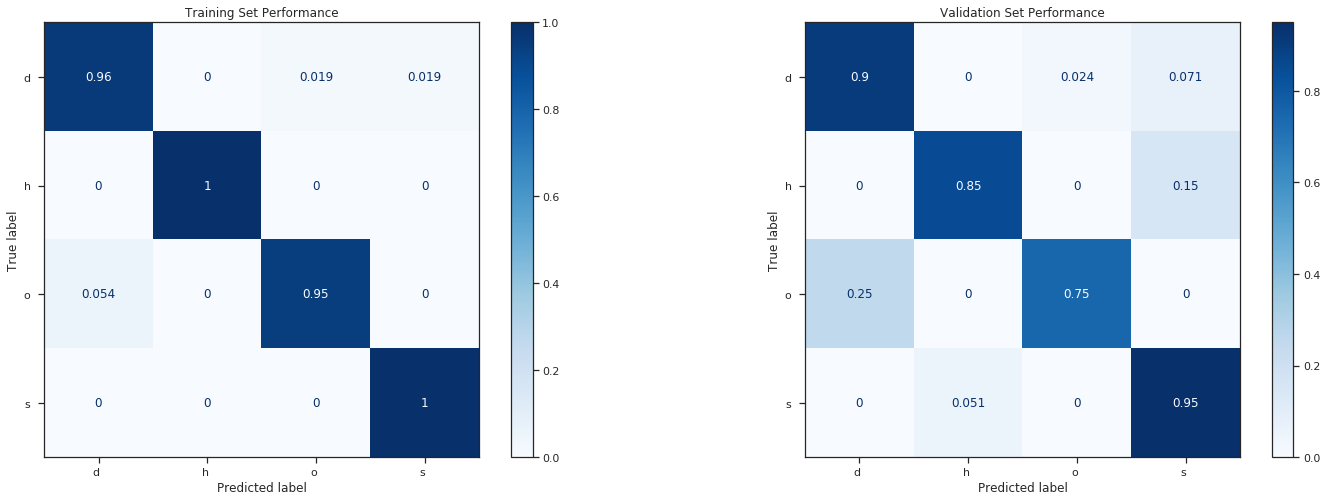

In [ ]:
#KNN with 3, 7 and 13 nearest neighbors.
print('CKNN, with No. Neighbours = {}'.format(3))
cknn_3 = KNeighborsClassifier(n_neighbors=3)
cknn_3.fit(X_train, Y_train)
eval_model(cknn_3, X_train, Y_train, X_val, Y_val, True)

CKNN, with No. Neighbours = 7
Misclassified samples: 16
Accuracy (Validation Set): 0.8769230769230769


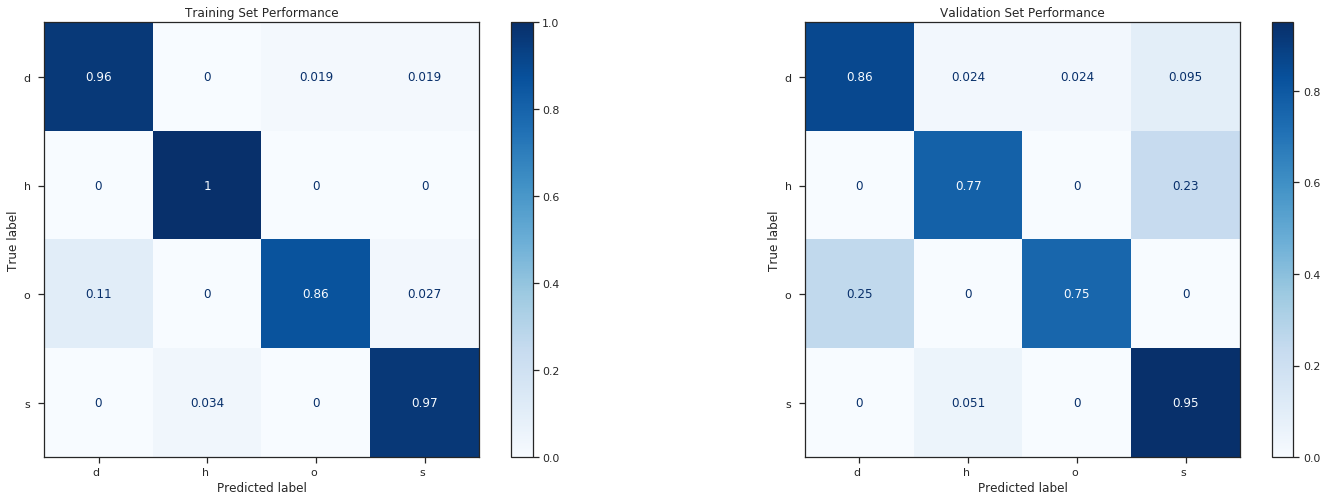

In [ ]:
#KNN with 3, 7, and 13 nearest neighbors.
print('CKNN, with No. Neighbours = {}'.format(7))
cknn_7 = KNeighborsClassifier(n_neighbors=7)
cknn_7.fit(X_train, Y_train)
eval_model(cknn_7, X_train, Y_train, X_val, Y_val, True)

CKNN, with No. Neighbours = 13
Misclassified samples: 15
Accuracy (Validation Set): 0.8846153846153846


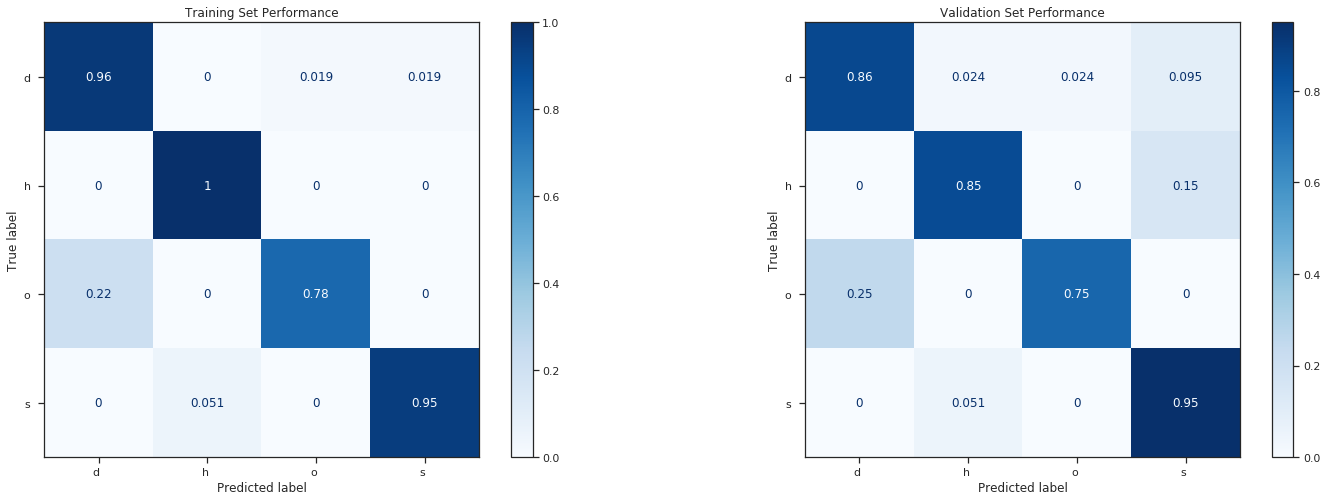

In [ ]:
#KNN with 2, 7, and 13 nearest neighbors.
print('CKNN, with No. Neighbours = {}'.format(13))
cknn_13 = KNeighborsClassifier(n_neighbors=13)
cknn_13.fit(X_train, Y_train)
eval_model(cknn_13, X_train, Y_train, X_val, Y_val, True)

And check that we have all the classes in the test set - in this case we do.
When re-training the model, reduce the 'NumNeighbors' parameter to increase the chance of being able to get these rare classes right. If we have this too big, then by virtue of a lack of sample points, these rare classes will always be classified as something else simply becuase there are not enough points.

Misclassified samples: 40
Accuracy (Validation Set): 0.7948717948717948


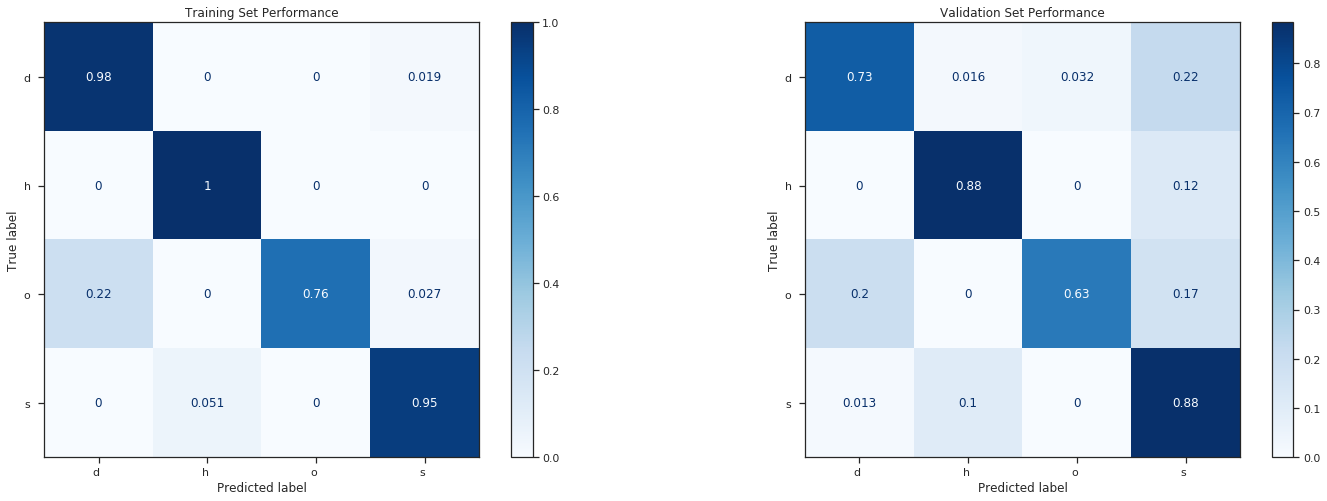

In [ ]:
cknn = KNeighborsClassifier(n_neighbors=20)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train,  X_test, Y_test, True)

This has improved our results slightly - but not that much really. That said, our confusion matrix looks much more promising, even if the overall accuracy is still poor.

# Ensemble Classifiers

## One vs. One

The sklearn SVM class will automatically extended itself to a 1v1 encoding when it get's shown multi-class data. it just does this

Misclassified samples: 19
Accuracy (Validation Set): 0.8538461538461538


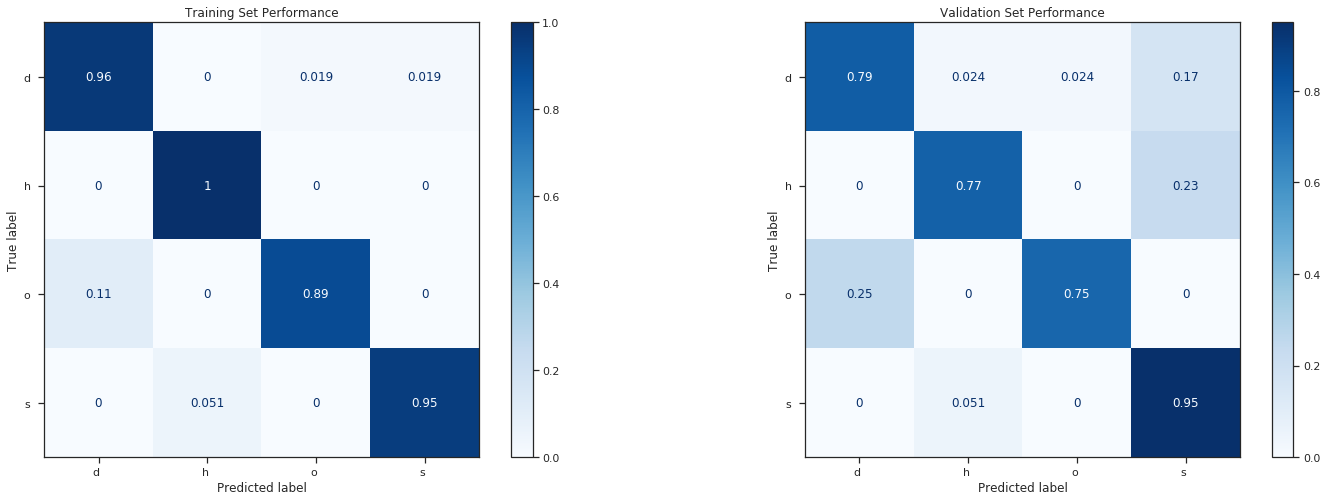

In [ ]:
svm = SVC()
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_val, Y_val, True)

Pretty poor fit, but we know there is a huge class imbalance. Lets try and fix that a tad by applying class weights to increase the weight of undersampled classes.

As noted in the lecture example, with sklearn it's really easy to incorporate the class weights.

One vs. One
Misclassified samples: 17
Accuracy (Validation Set): 0.8692307692307693


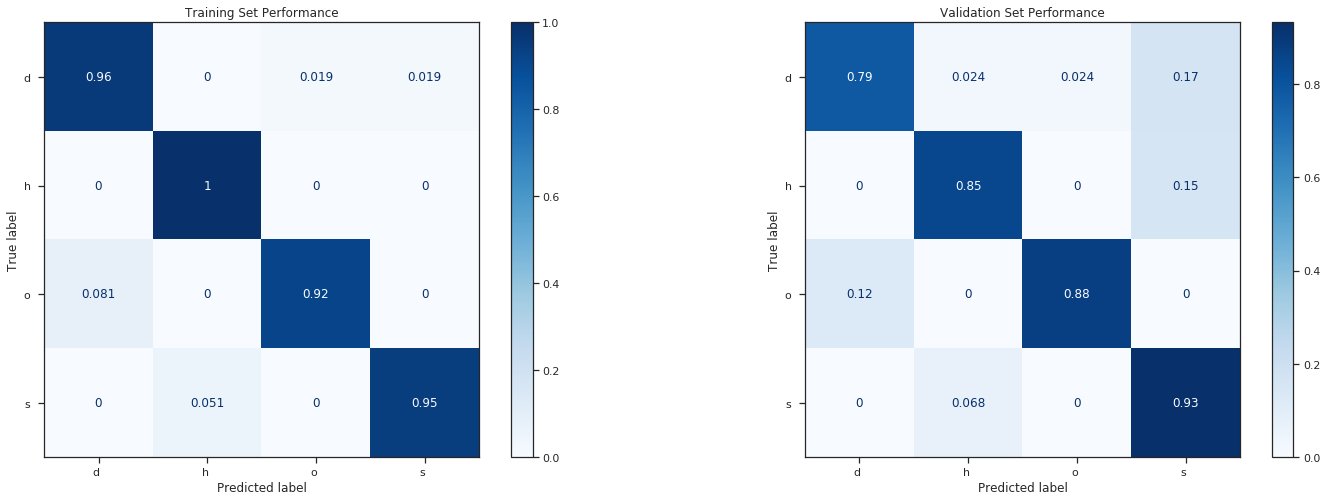

In [ ]:
print('One vs. One')
svm = SVC(class_weight='balanced')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_val, Y_val, True)

This gives us mixed results:
* our classification rate drops (quite a bit)
* we can actually (sometimes) classify all classes, but not very well

Let's try a one vs all.

One vs. All
Misclassified samples: 19
Accuracy (Validation Set): 0.8538461538461538


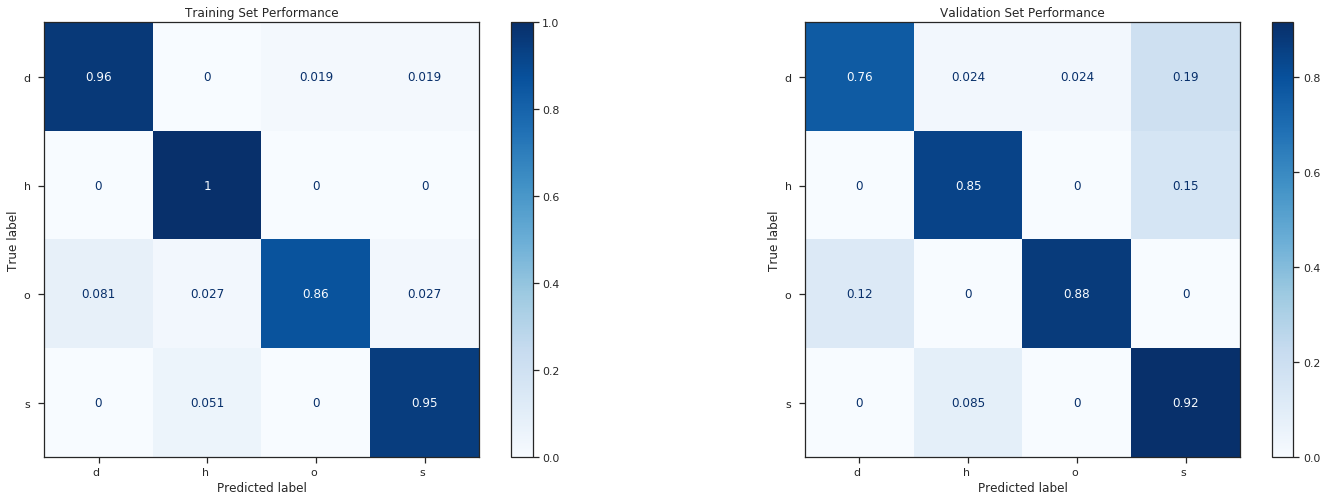

In [ ]:
print('One vs. All')
onevsall_svm = OneVsRestClassifier(SVC(class_weight='balanced'))
onevsall_svm.fit(X_train, Y_train)
eval_model(onevsall_svm, X_train, Y_train, X_val, Y_val, True)

This is a bit better, but still not great. At this point it's worth considering if we have the right hyperparameters for our SVMs. The next steps in optimising this (which I would encourage you to try on your own) would be to perform a grid search for different SVM parameters. In particular looking at values of C and the kernels. I would suggest, at least initially, restricting yourself to a RBF kernel and seeing if you can improve performance.


Linear SVM, with C = inf
Misclassified samples: 19
Accuracy (Validation Set): 0.8538461538461538

Linear SVM, with C = 100
Misclassified samples: 19
Accuracy (Validation Set): 0.8538461538461538

Linear SVM, with C = 10
Misclassified samples: 19
Accuracy (Validation Set): 0.8538461538461538

Linear SVM, with C = 0.1
Misclassified samples: 19
Accuracy (Validation Set): 0.8538461538461538

Linear SVM, with C = 0.01
Misclassified samples: 17
Accuracy (Validation Set): 0.8692307692307693

Linear SVM, with C = 0.001
Misclassified samples: 17
Accuracy (Validation Set): 0.8692307692307693

Linear SVM, with C = 0.0001
Misclassified samples: 15
Accuracy (Validation Set): 0.8846153846153846

Linear SVM, with C = 1e-05
Misclassified samples: 28
Accuracy (Validation Set): 0.7846153846153846


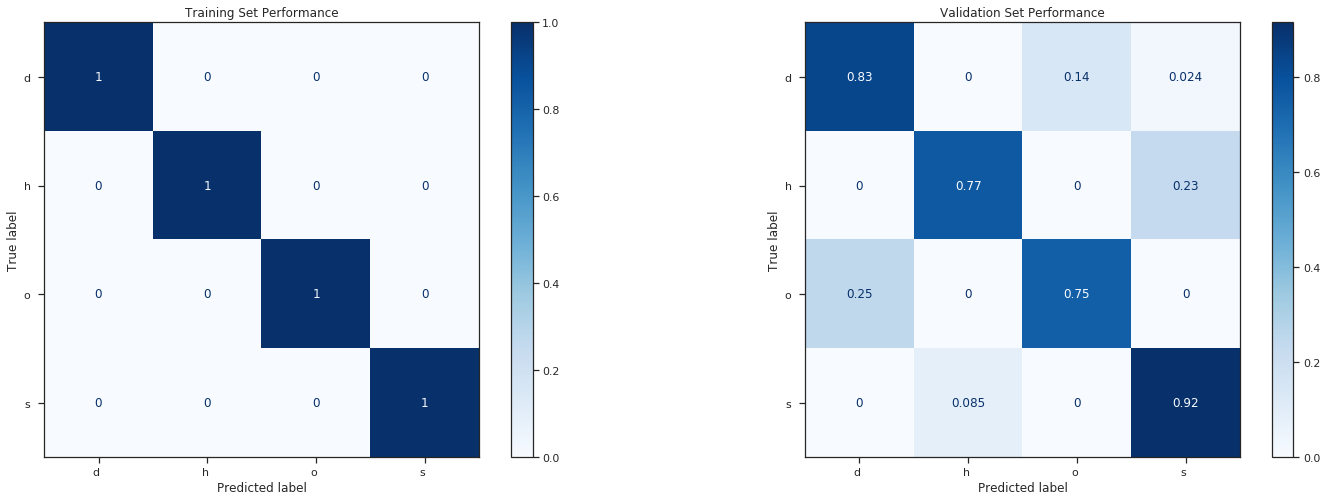

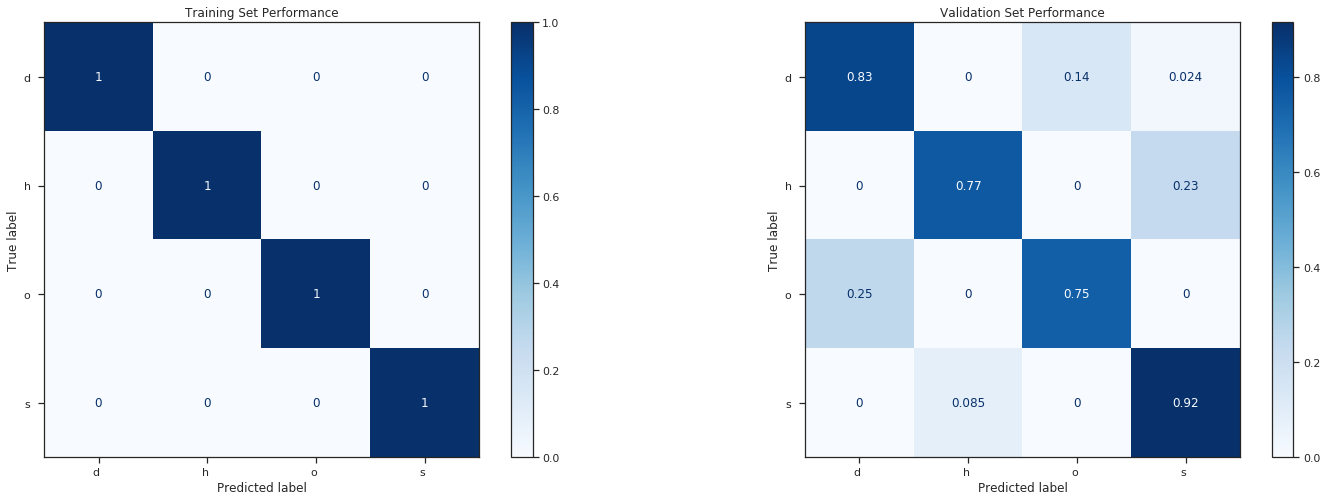

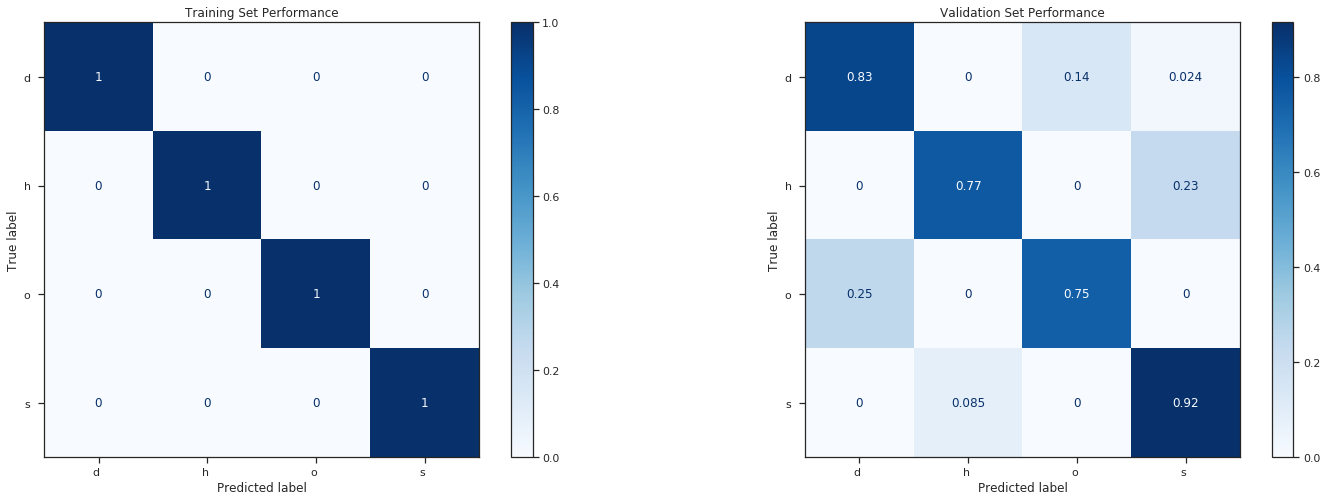

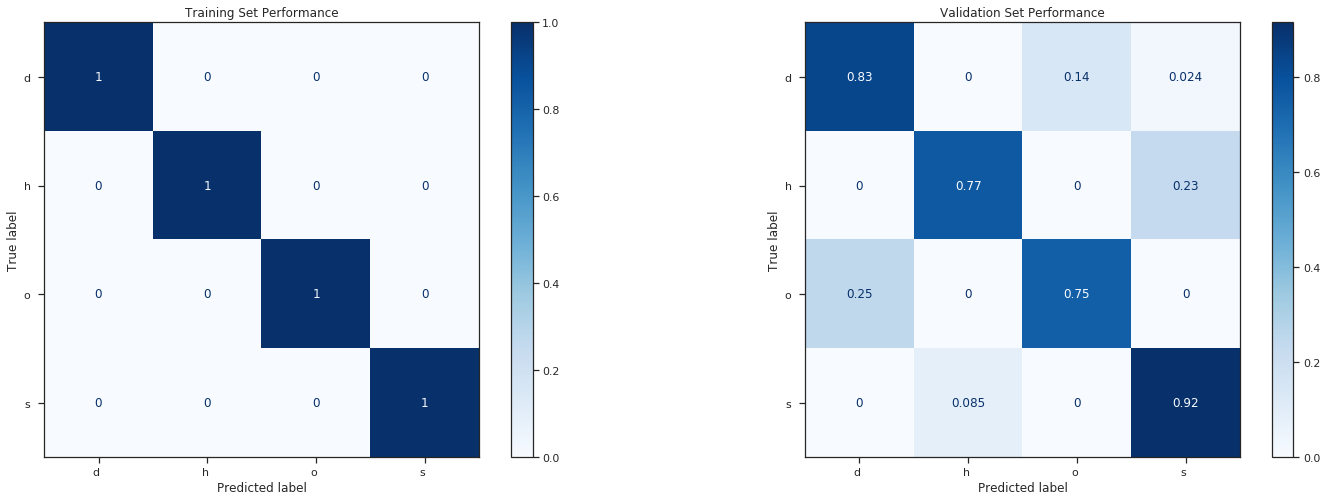

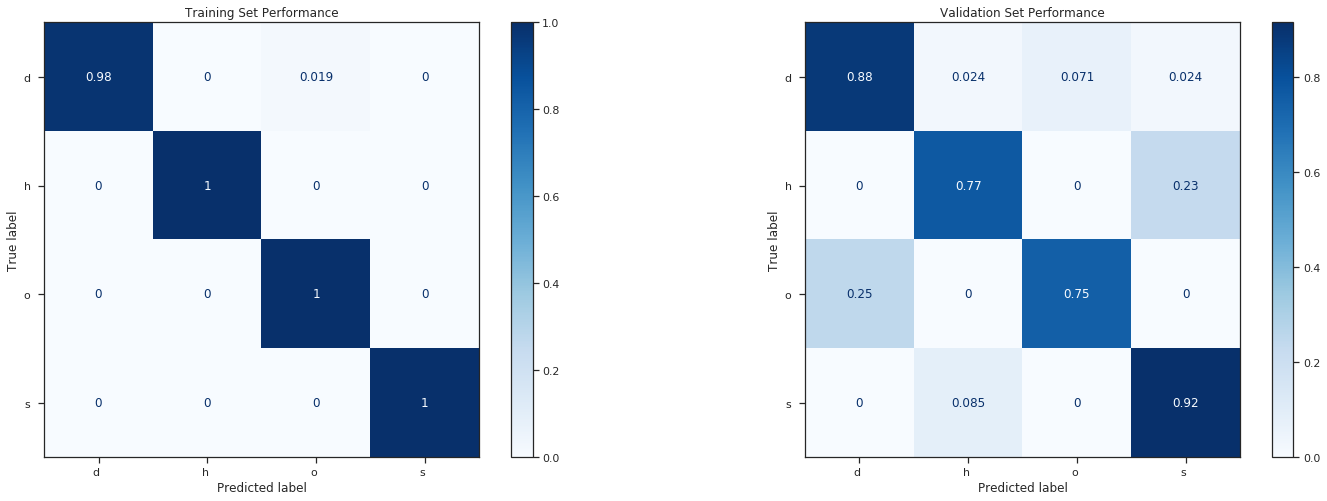

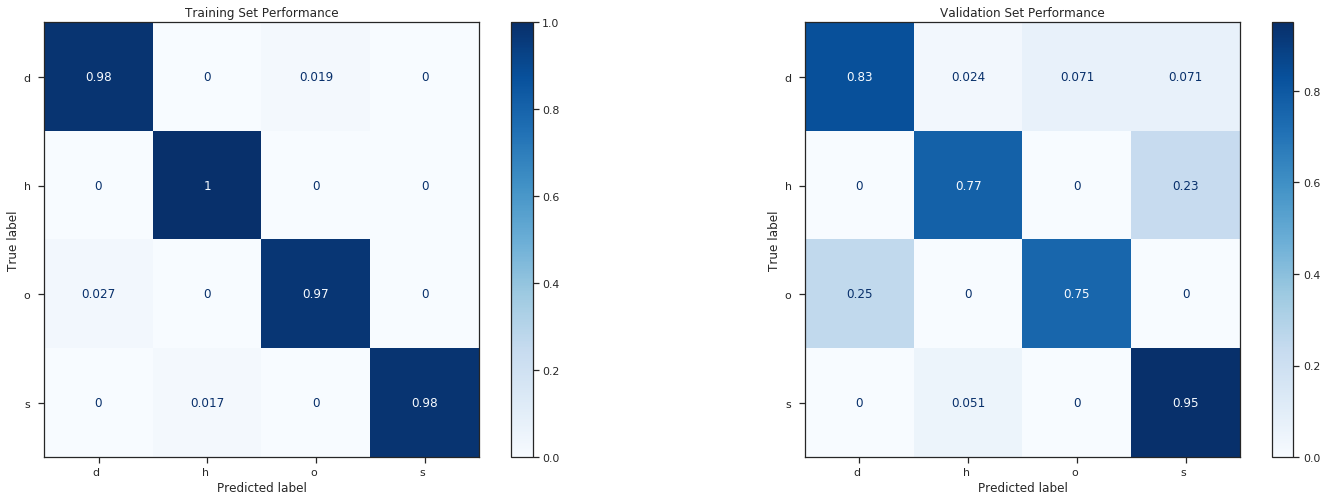

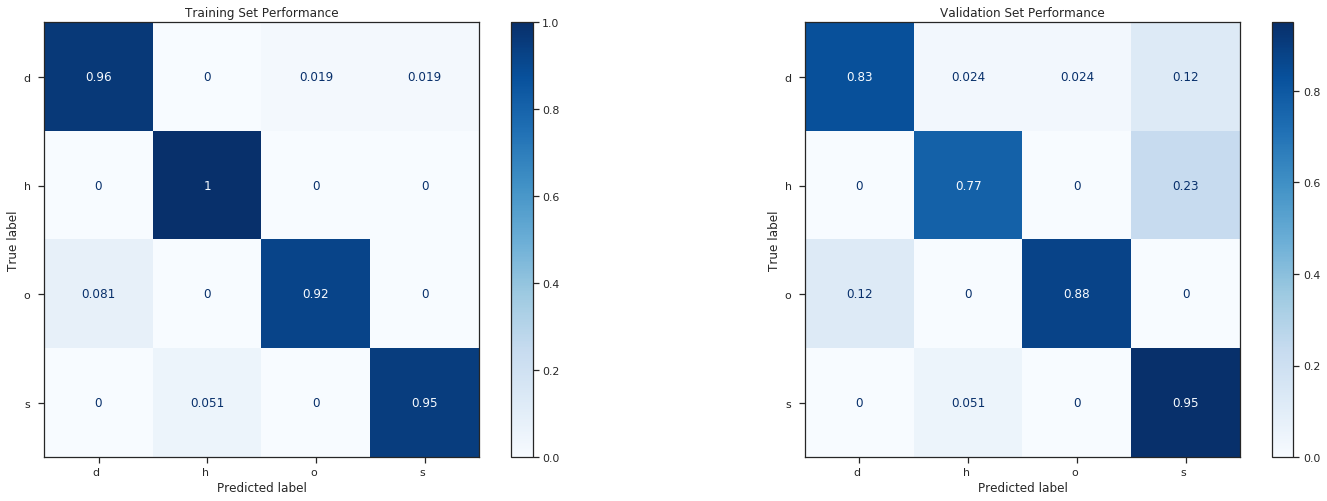

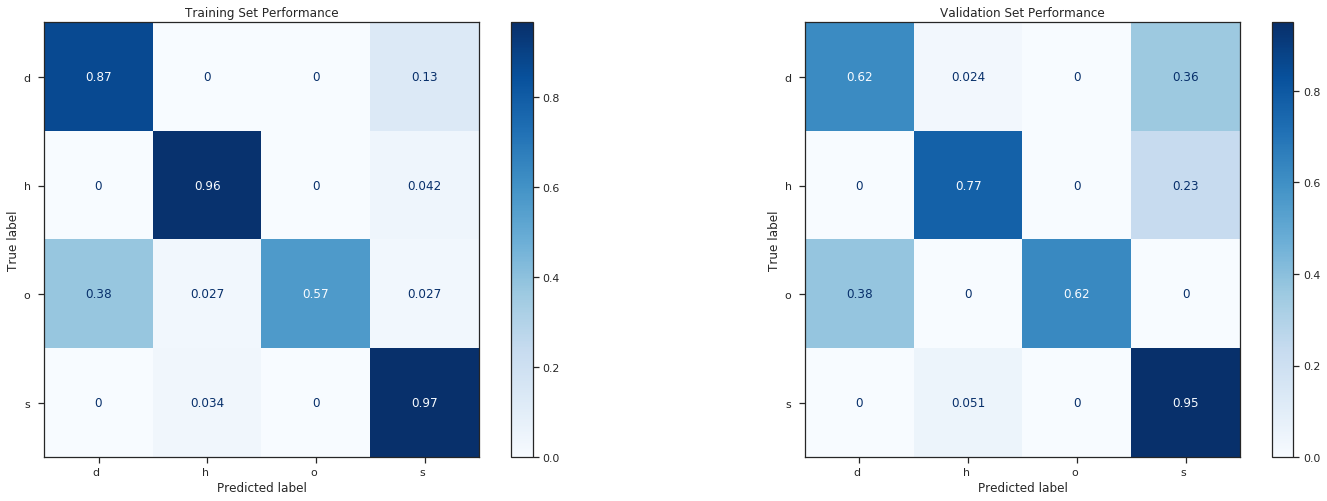

In [ ]:
for C in [np.inf, 100, 10, 0.1, 0.01, 0.001, 0.0001, 0.00001]:
  print('\nLinear SVM, with C = {}'.format(C))
  svm = SVC(C=C, kernel='linear', max_iter=10e5)
  svm.fit(X_train, Y_train)
  eval_model(svm, X_train, Y_train, X_val, Y_val, True)

## Non Linear Kernels
We'll start by working with RBF (also called the squared exponential, or Gaussian Kernel).
We need to set the scale parameter. By default, SVC from SKLearn will set the scale to  `1 / (n_features * X.var())`.
To use this default, we set the `gamma` argument within the RBF kernel to be the string `'scale'`.
Otherwise we can set `gamma` to whatever we want to control the scale.

We'll try a few options.


RBF SVM, with scale = 0.01
Misclassified samples: 47
Accuracy (Validation Set): 0.6384615384615384

RBF SVM, with scale = 0.001
Misclassified samples: 15
Accuracy (Validation Set): 0.8846153846153846

RBF SVM, with scale = 0.0001
Misclassified samples: 16
Accuracy (Validation Set): 0.8769230769230769

RBF SVM, with scale = scale
Misclassified samples: 19
Accuracy (Validation Set): 0.8538461538461538


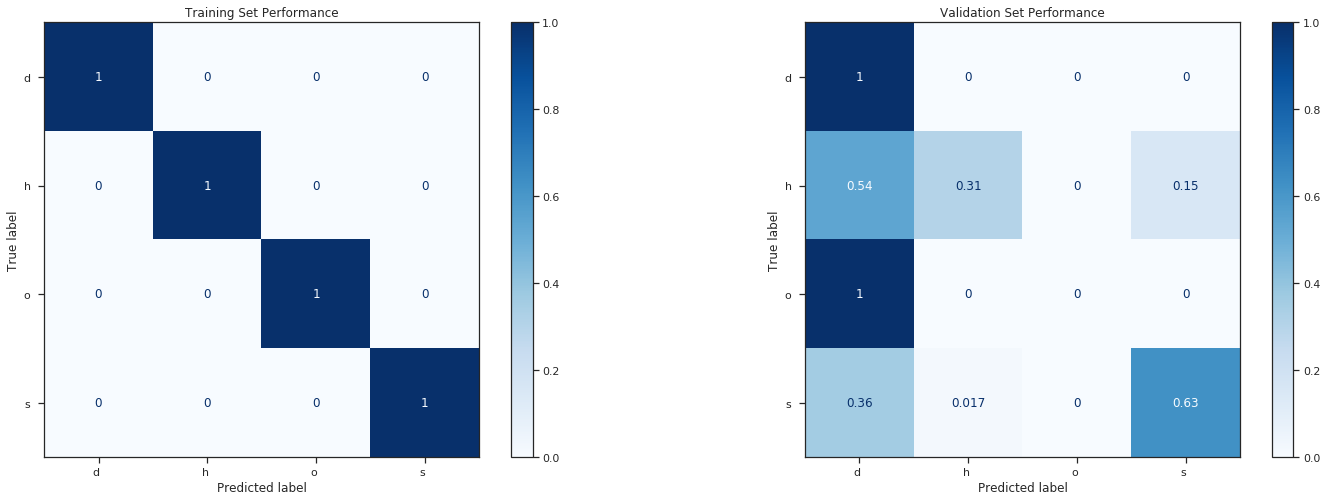

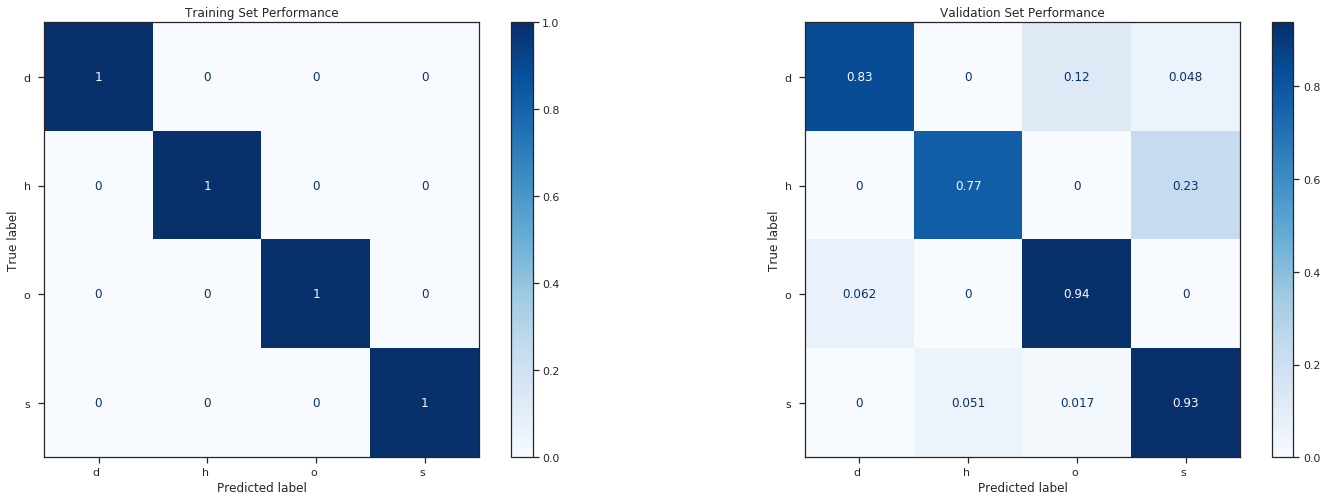

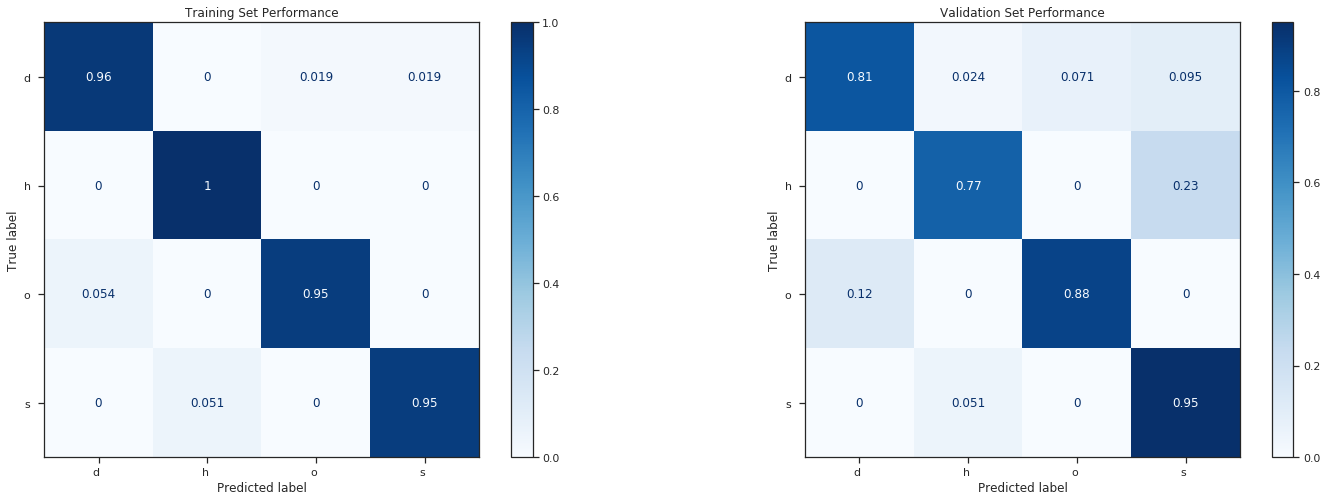

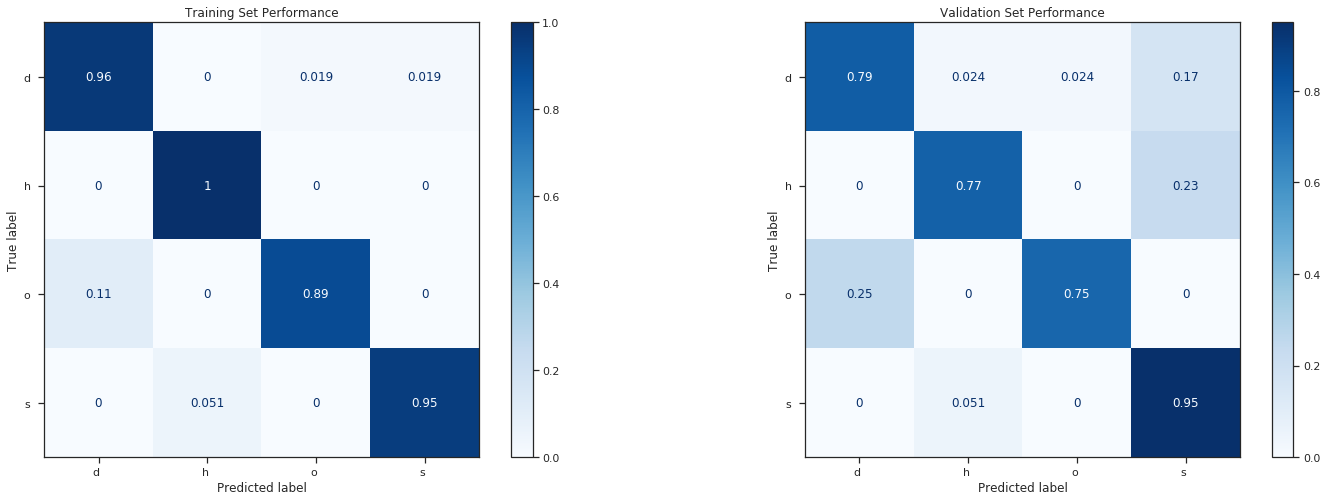

In [ ]:
for kernel_scale in [0.01, 0.001, 0.0001, 'scale']:
  print('\nRBF SVM, with scale = {}'.format(kernel_scale))
  svm = SVC(kernel='rbf', gamma=kernel_scale, max_iter=10e6)
  svm.fit(X_train, Y_train)
  eval_model(svm, X_train, Y_train, X_val, Y_val, True)

Trying Polynomial kernel now. Again, we'll try a bunch of different polynomial degrees. We can think of higher degrees as just being more complex (i.e. more dimensions).

Polynomial Kernel SVM, with degree = 2
Misclassified samples: 19
Accuracy (Validation Set): 0.8538461538461538
Polynomial Kernel SVM, with degree = 3
Misclassified samples: 17
Accuracy (Validation Set): 0.8692307692307693
Polynomial Kernel SVM, with degree = 5
Misclassified samples: 18
Accuracy (Validation Set): 0.8615384615384616
Polynomial Kernel SVM, with degree = 10
Misclassified samples: 22
Accuracy (Validation Set): 0.8307692307692308


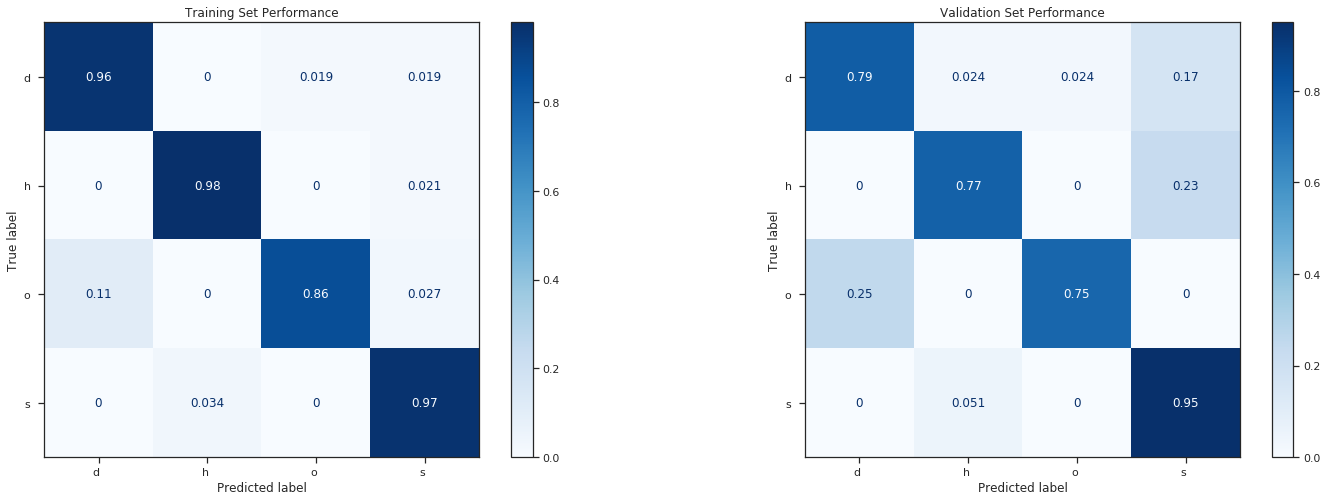

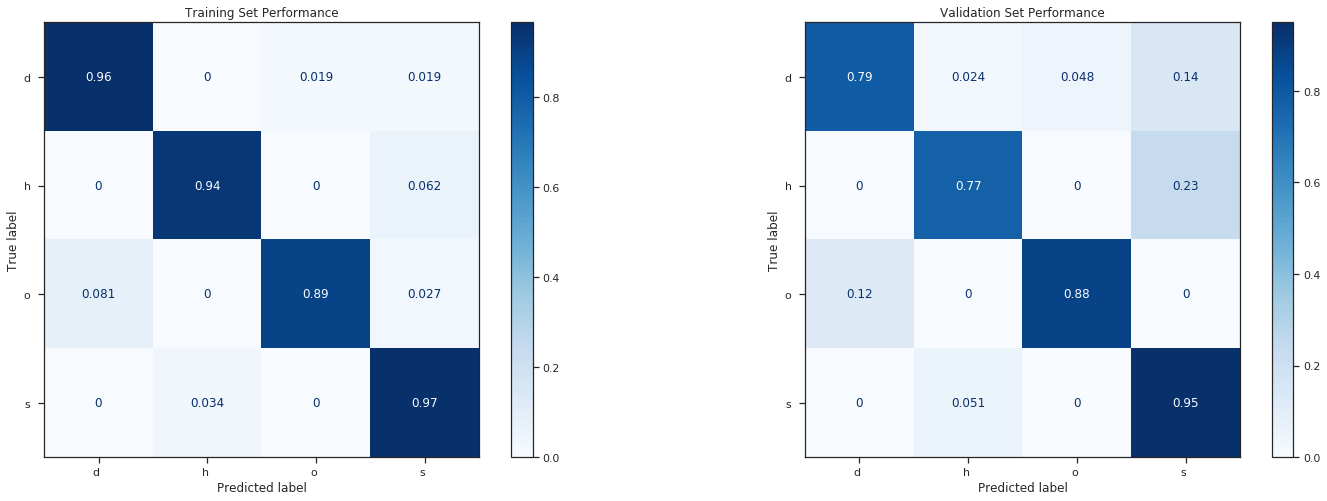

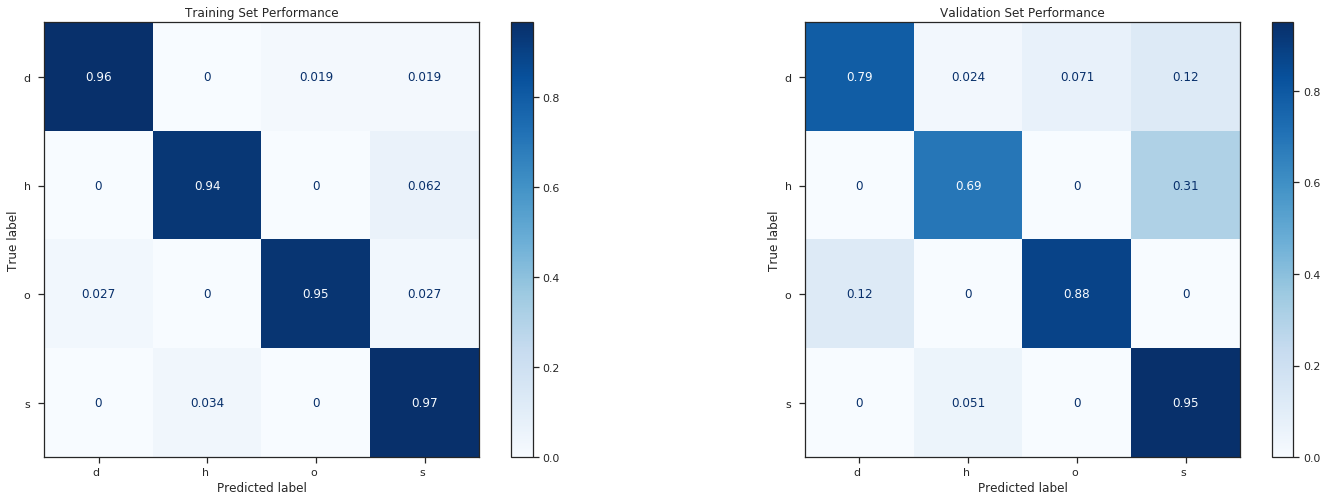

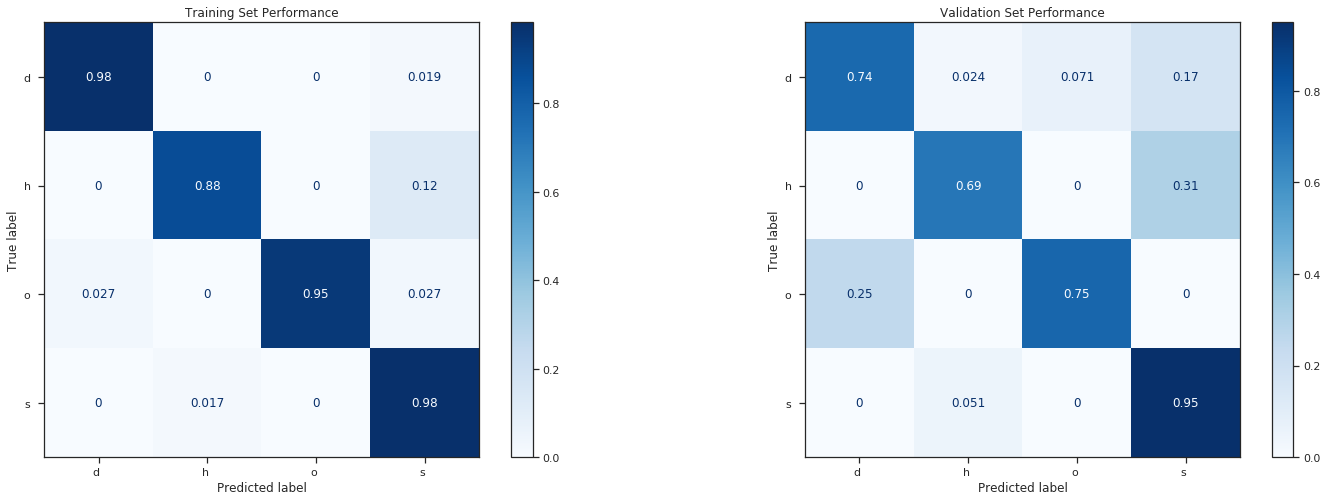

In [ ]:
for degree in [2, 3, 5, 10]:
  print('Polynomial Kernel SVM, with degree = {}'.format(degree))
  svm = SVC(kernel='poly', degree=degree, max_iter=10e6)
  svm.fit(X_train, Y_train)
  eval_model(svm, X_train, Y_train, X_val, Y_val, True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],
                     'C': [100, 10, 1, 0.1, 0.01, 0.001]},
                    {'kernel': ['linear'], 'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
                    {'kernel': ['poly'], 'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_val, clf.predict(X_val)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

Best parameters set found on development set:

{'C': 0.01, 'kernel': 'linear'}

Grid scores on development set:

0.965 (+/-0.022) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.964 (+/-0.041) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976 (+/-0.046) for {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
0.965 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.976 (+/-0.046) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.032) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
0.965 (+/-0.022) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.032) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.921 (+/-0.066) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.627 (+/-0.051) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.915 (+/-0.069) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.075 (+/-0.006) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.075 (+/-0.006) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.075 (+/-0.006) for {'C': 0.01, 'gamma': 0.00

## Evaluation

CKNN, with No. Neighbours = 3
Misclassified samples: 39
Accuracy (Testing Set): 0.8

SVM, with RBF kernel and gamma = 0.001
Misclassified samples: 38
Accuracy (Testing Set): 0.8051282051282052


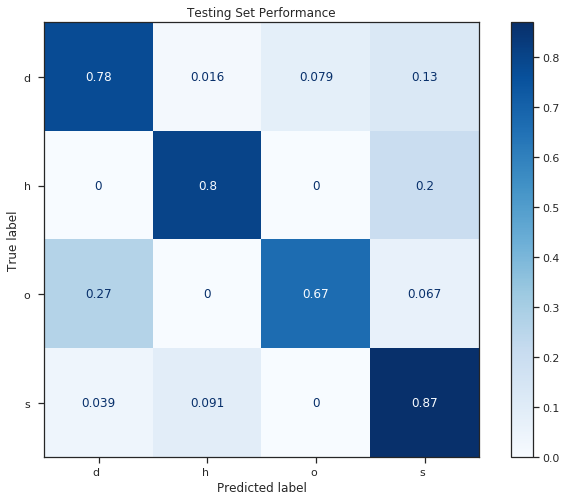

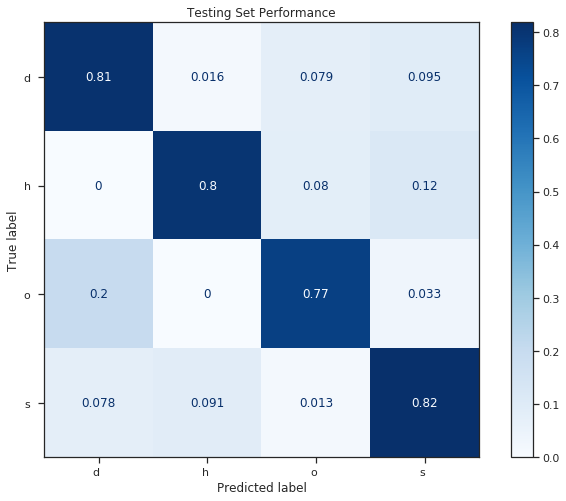

In [ ]:
# Selected Final Model
# CKNN
print('CKNN, with No. Neighbours = {}'.format(3))
cknn = KNeighborsClassifier(n_neighbors=3)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test, False)

print('\nSVM, with RBF kernel and gamma = {}'.format(0.001))
svm = SVC(kernel='rbf', gamma=0.001, max_iter=10e6)
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test, False)